<a href="https://colab.research.google.com/github/pastoril10/Python---AnaliseTenica_BBAS3/blob/main/Python_AnaliseTecnica_BBAS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

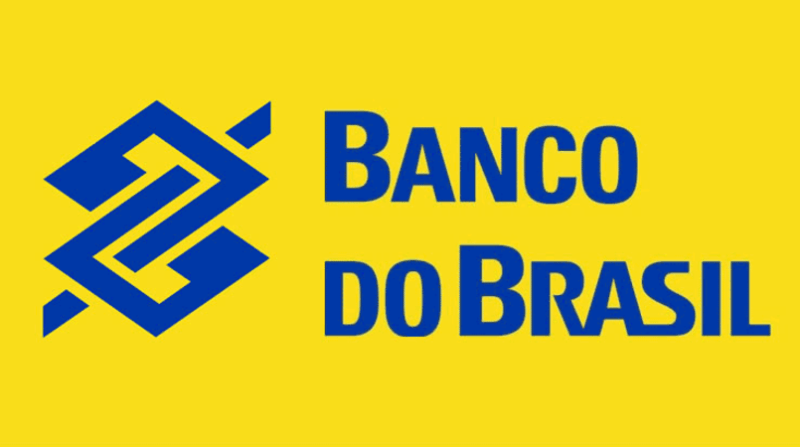


Neste trabalhamos, fizemos análises técnicas das ações do Banco do Brasil listado na B3. 

As informações históricas da ação do Banco do Brasil (BBAS3) foram importadas usando a biblioteca investpy 
https://readthedocs.org/projects/investpy/downloads/pdf/latest/


As análises foram feitas por meio da biblioteca ta - Technical Analysis.

https://technical-analysis-library-in-python.readthedocs.io/en/latest/)


Fizemos análise de indicadores de momento, volume, volatilidade e tendência. 






# Intalando bibliotecas

In [1]:
pip install ta
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# pip install investpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# 1. Importando as bibliotecas

In [14]:
import ta
# import investpy
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# 2. Captura de dados

In [17]:
bb = yf.Ticker("BBAS3.SA")

In [18]:
df = bb.history(start="2019-01-01",end="2022-01-01")

In [19]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-02:00,35.105776,37.765305,35.022190,36.929451,14905300,0.0,0.0
2019-01-03 00:00:00-02:00,36.853481,37.385387,36.359567,37.081440,8879100,0.0,0.0
2019-01-04 00:00:00-02:00,36.534339,37.864103,36.412757,37.081440,8859200,0.0,0.0
2019-01-07 00:00:00-02:00,37.104238,37.590552,36.602724,36.838284,9393500,0.0,0.0
2019-01-08 00:00:00-02:00,36.929458,37.271398,35.584498,36.420349,14517300,0.0,0.0


In [16]:
# df = investpy.get_stock_historical_data(stock = "BBAS3", 
#                                         country = "Brazil",
#                                         from_date = "01/01/2019",
#                                         to_date = "01/01/2022")

# 3. Indicadores de momento

## 3.1. RSI - Relative Strenght index

In [11]:
from ta.momentum import RSIIndicator
from plotly.subplots import make_subplots

In [12]:
rsi = RSIIndicator(close = df["Close"],
                   window = 30)

df["RSI"] = rsi.rsi()

In [15]:
fig = make_subplots(rows = 2, cols = 1)


fig.add_trace(go.Scatter(name = "RSI", 
                         x = df.index, 
                         y = df["RSI"]), 
                         row = 2, 
                         col = 1)

#Tracejado na horizontal em y = 70
fig.add_hline(y=70, 
              line_width=3, 
              line_dash="dash",
              row=2, 
              col=1)

#Tracejado na horizontal em y = 30
fig.add_hline(y=30,
              line_width=3, 
              line_dash="dash",
              row=2, 
              col=1)
                        

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)


#retangulo vertical com o periodo de queda das ações durante o inicio do COVID19
fig.add_vrect(x0="2020-02-12", 
              x1="2020-04-15", 
              annotation_text="COVID", 
              annotation_position="top left",
              annotation=dict(font_size=20, 
                              font_family="Times New Roman"),
              fillcolor="green", 
              opacity=0.25, 
              line_width=0, 
              row=1, 
              col=1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / RSI do BBAS3 - Banco do Brasil")
fig.show()

## 3.2. Percentage Price Oscillator (PPO)

In [20]:
from ta.momentum import PercentagePriceOscillator

In [21]:
PPO = PercentagePriceOscillator(df["Close"])

df["PPO"] = PPO.ppo()
df["PPO_hist"]= PPO.ppo_hist()
df["PPO_line"]= PPO.ppo_signal()

In [22]:
fig = make_subplots(rows = 2, cols = 1, specs = [[{"secondary_y":True}], [{"secondary_y":True}]])


fig.add_trace(go.Scatter(name = "PPO", 
                         x = df.index, 
                         y = df["PPO"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Scatter(name = "PPO_line", 
                         x = df.index, 
                         y = df["PPO_line"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Bar(name = "PPO_hist", 
                         x = df.index, 
                         y = df["PPO_hist"]), 
                         row = 2, 
                         col = 1,
              secondary_y = True)

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)

#retangulo vertical com o periodo de queda das ações durante o inicio do COVID19
fig.add_vrect(x0="2020-02-12", 
              x1="2020-04-15", 
              annotation_text="COVID", 
              annotation_position="top left",
              annotation=dict(font_size=20, 
                              font_family="Times New Roman"),
              fillcolor="green", 
              opacity=0.25, 
              line_width=0, 
              row=1, 
              col=1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / PPO do BBAS3 - Banco do Brasil")
fig.show()

## 3.3 Rate of Change

ROC = (Fechamento - Fechamento de n periodos anteriores / fechamento de n periodo inferiores) * 100

In [23]:
from ta.momentum import ROCIndicator

In [24]:
roc = ROCIndicator(df["Close"])

df["ROC"] = roc.roc()

In [25]:
fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(go.Scatter(name = "ROC", 
                         x = df.index, 
                         y = df["ROC"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / ROC do BBAS3 - Banco do Brasil")
fig.show()

# 4. Indicadores de Volume

## 4.1. OBV - On Balance Volume

In [26]:
from ta.volume import OnBalanceVolumeIndicator

In [27]:
obv = OnBalanceVolumeIndicator(df["Close"], df["Volume"])

df["OBV"] = obv.on_balance_volume()


In [28]:
fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(go.Bar(name = "OBV", 
                         x = df.index, 
                         y = df["OBV"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / OBV do BBAS3 - Banco do Brasil")
fig.show()

## 4.2. VWAP - Volume Weighted Average Price

In [29]:
from ta.volume import VolumeWeightedAveragePrice

In [30]:
vwap = VolumeWeightedAveragePrice(df["High"], 
                                df["Low"], 
                                df["Close"], 
                                df["Volume"])
#Window default = 14
df["VWAP"] = vwap.volume_weighted_average_price()

In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(name = "VWAP", 
                         x = df.index, 
                         y = df["VWAP"]))

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]))

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / VWAP do BBAS3 - Banco do Brasil")
fig.show()


## 4.3. Money Flow Index

In [32]:
from ta.volume import MFIIndicator

In [33]:

mfi = MFIIndicator(df["High"], 
                                df["Low"], 
                                df["Close"], 
                                df["Volume"])

df["MFI"] = mfi.money_flow_index()

In [34]:
fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(go.Bar(name = "MFI", 
                         x = df.index, 
                         y = df["MFI"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / MFI do BBAS3 - Banco do Brasil")
fig.show()

# 5. Indicadores de Volatilidade

## 5.1. Bandas de Bollinger

In [35]:
from ta.volatility import BollingerBands

In [36]:
bb = BollingerBands(close = df["Close"],
                    window = 10,
                    window_dev = 2)

df["BB_bbm"] = bb.bollinger_mavg()
df["BB_bbh"] = bb.bollinger_hband()
df["BB_bbl"] = bb.bollinger_lband()

In [37]:
fig = go.Figure()

fig.add_trace(go.Scatter(name = "MédiaMovel", 
                         x = df.index, 
                         y = df["BB_bbm"]))

fig.add_trace(go.Scatter(name = "Banda Superior", 
                         x = df.index, 
                         y = df["BB_bbh"]))


fig.add_trace(go.Scatter(name = "Banda Inferiorr", 
                         x = df.index, 
                         y = df["BB_bbl"]))

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]))

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / Bandas de Bollinger do BBAS3 - Banco do Brasil")
fig.show()

## 5.2. ATR - Average True Range

In [38]:
from ta.volatility import AverageTrueRange

In [39]:
atr = AverageTrueRange(df["High"], 
                                df["Low"], 
                                df["Close"])


df["ATR"] = atr.average_true_range()

In [40]:
fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(go.Scatter(name = "ATR", 
                         x = df.index, 
                         y = df["ATR"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / ATR do BBAS3 - Banco do Brasil")
fig.show()

## 5.3. Keltner Channel

In [41]:
from ta.volatility import KeltnerChannel

In [42]:
keltner = KeltnerChannel(df["High"], 
                         df["Low"],
                         df["Close"])
df["KELTNER_MM"] = keltner.keltner_channel_mband()
df["KELTNER_HB"] = keltner.keltner_channel_hband()
df["KELTNER_LB"] = keltner.keltner_channel_lband()

In [43]:
fig = go.Figure()

fig.add_trace(go.Scatter(name = "MédiaMovel", 
                         x = df.index, 
                         y = df["KELTNER_MM"]))

fig.add_trace(go.Scatter(name = "Banda Superior", 
                         x = df.index, 
                         y = df["KELTNER_HB"]))


fig.add_trace(go.Scatter(name = "Banda Inferiorr", 
                         x = df.index, 
                         y = df["KELTNER_LB"]))

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]))

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / Keltner Channel do BBAS3 - Banco do Brasil")
fig.show()

# 6. Indicadores de tendência

## 6.1. MACD

In [44]:
from ta.trend import MACD

In [45]:
macd = MACD(df["Close"])

df["MACD_LINE"] = macd.macd()
df["MACD_DIFF"] = macd.macd_diff()

In [46]:
fig = make_subplots(rows = 2, cols = 1)

fig.add_trace(go.Bar(name = "MACD", 
                         x = df.index, 
                         y = df["MACD_LINE"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Scatter(name = "MACD_DIFF", 
                         x = df.index, 
                         y = df["MACD_DIFF"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Scatter(name = "MACD_LINE", 
                         x = df.index, 
                         y = df["MACD_LINE"]), 
                         row = 2, 
                         col = 1)

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]),
                         row = 1,
                         col = 1)

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / MACD do BBAS3 - Banco do Brasil")
fig.show()

## 6.2. Simple Moving Average

In [47]:
from ta.trend import SMAIndicator

In [48]:
sma_short = SMAIndicator(df["Close"], window = 5)
sma_long = SMAIndicator(df["Close"], window = 30)

df["SMA_SHORT"] = sma_short.sma_indicator()
df["SMA_LONG"] = sma_long.sma_indicator()

In [49]:
fig = go.Figure()

fig.add_trace(go.Scatter(name = "SMA_SHORT", 
                         x = df.index, 
                         y = df["SMA_SHORT"]))

fig.add_trace(go.Scatter(name = "SMA_LONG", 
                         x = df.index, 
                         y = df["SMA_LONG"]))

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]))

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / Média móvel Simples do BBAS3 - Banco do Brasil")
fig.show()

## 6.3. Exponential Moving Average

In [50]:
from ta.trend import EMAIndicator

In [51]:
ema_short = EMAIndicator(df["Close"], window = 5)
ema_long = EMAIndicator(df["Close"], window = 30)

df["EMA_SHORT"] = ema_short.ema_indicator()
df["EMA_LONG"] = ema_long.ema_indicator()

In [52]:
fig = go.Figure()

fig.add_trace(go.Scatter(name = "EMA_SHORT", 
                         x = df.index, 
                         y = df["EMA_SHORT"]))

fig.add_trace(go.Scatter(name = "EMA_LONG", 
                         x = df.index, 
                         y = df["EMA_LONG"]))

fig.add_trace(go.Candlestick(name = "BBAS3",
                         x = df.index,
                         close = df["Close"],
                         open = df["Open"],
                         high = df["High"],
                         low = df["Low"]))

fig.update_layout(xaxis_rangeslider_visible = False, 
                  title = "Gráfico de preços / Média móvel Exponencial do BBAS3 - Banco do Brasil")
fig.show()